In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/2020_Intern_12__T​RI01_Comp/2020_08-03_2020_Intern_12_TRI01_Comp_Parameter_v01.csv', skiprows=1)

print(df.head())
print(df.shape)

   Whether the scene is able to convey the same message of input text? ???? ????? ??? ????? ??????? ?? ??? ???? ???? ??? ?? ??? ??? ?? ?  ...  How much difficult is the input text to be visualized by human? ?????? ?????? ?????? ???? ?? ???, ????? ??????? ????? ??????? ???
0                                                  4                                                                                      ...                                                  0                                                                                
1                                                  3                                                                                      ...                                                  1                                                                                
2                                                  3                                                                                      ...                                        

In [3]:
X = df.iloc[:, :-1]
X

,Whether the scene is able to convey the same message of input text? ???? ????? ??? ????? ??????? ?? ??? ???? ???? ??? ?? ??? ??? ?? ?,"Whether the scene has sufficient number of objects as per the requirement to show the meaning of input text? ????? ??????? ?? ???? ??, ???? ????? ??? ???????? ???????? ?????? ??? ??? ?","Depending on the input text, whether the objects shown in the scene are properly placed? ????? ??????? ?? ???? ??, ???? ????? ??? ??????? ??? ??????? ???? ??? ?? ??? ??? ????","Whether the colour mentioned of objects in the scene is appropriate according to Input Text? ????? ??????? ?? ???? ??, ???? ????? ??? ??????? ??? ??????? ?? ??? ?? ??????? ??????? ???","Whether the size, shape and texture of mentioned objects in the scene is appropriate according to Input Text? ????? ??????? ?? ???? ??, ???? ????? ??? ??????? ??? ??????? ?? ??????(????) ?? ???? ??????? ???","Whether the background of scene is chosen properly according to Input Text? ????? ??????? ?? ???? ??, ???? ????? ?? ????????? ??????? ???",Whether the scene is able to convey any message without taking reference of input text????? ????? ????????? ?? ?? ????? ??????? ?? ??? ???? ?? ??? ???? ?? ???? ???,Whether the scene composition is realistic? ???? ????? ?????? ???????? ?? ?,Whether the object orientation are appropriate in the scene? ???? ????? ??? ??????? ?? ?????/????? ??????? ???
0,4,4,4,4,4,4,4,4,4
1,3,4,4,2,3,3,3,3,3
2,3,4,4,4,4,4,4,3,4
3,2,4,2,1,3,3,3,1,0
4,4,3,3,3,3,3,4,4,3
...,...,...,...,...,...,...,...,...,...
1017,3,3,3,3,2,3,3,3,1
1018,3,3,3,3,2,4,3,3,1
1019,2,3,4,1,2,4,2,3,3
1020,3,3,3,3,2,4,3,3,1


In [4]:
y = df.iloc[:, -1]
y

0       0
1       1
2       0
3       3
4       1
       ..
1017    2
1018    2
1019    2
1020    2
1021    2
Name: How much difficult is the input text to be visualized by human? ?????? ?????? ?????? ???? ?? ???, ????? ??????? ????? ??????? ???, Length: 1022, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

#It is made 0.1196 as compared to 0.2 just to have even numbers (818 and 204) for samples (no real effect) 
#and it is the set I have already explored
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1996, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

#predction on dummy data
y_new = model.predict([[2, 3, 0, 1, 3, 2, 2, 0, 3]])
y_new

[1 2 0 1 1 1 0 0 1 0 2 0 2 1 2 0 1 1 1 1 1 1 0 0 0 0 1 2 1 1 1 1 1 2 1 0 1
 1 1 1 1 0 0 1 0 2 1 1 1 0 2 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 2 0 2 0
 1 2 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 2 2 2 1 2 0 2 0 0 0 1 1 1 0 0 1 2 2 1 2
 2 1 1 1 2 1 0 0 1 2 1 1 1 0 0 1 1 0 2 0 2 0 1 0 2 0 2 1 0 0 1 1 2 0 0 1 1
 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 2 2 2 2 0 0 1 0 0 2 0 2 1 1 1 2 1 1 1 1
 2 1 0 0 0 1 1 1 1 0 2 1 1 0 0 1 2 0 1]


array([2])

In [7]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7647058823529411


In [8]:
ques1 = "Whether the scene is able to convey the same message of input text? ???? ????? ??? ????? ??????? ?? ??? ???? ???? ??? ?? ??? ??? ?? ?"
ques2 = "Whether the scene has sufficient number of objects as per the requirement to show the meaning of input text? ????? ??????? ?? ???? ??, ???? ????? ??? ???????? ???????? ?????? ??? ??? ?"
ques3 = "Depending on the input text, whether the objects shown in the scene are properly placed? ????? ??????? ?? ???? ??, ???? ????? ??? ??????? ??? ??????? ???? ??? ?? ??? ??? ????"
ques4 = "Whether the colour mentioned of objects in the scene is appropriate according to Input Text? ????? ??????? ?? ???? ??, ???? ????? ??? ??????? ??? ??????? ?? ??? ?? ??????? ??????? ??? "
ques5 = "Whether the size, shape and texture of mentioned objects in the scene is appropriate according to Input Text? ????? ??????? ?? ???? ??, ???? ????? ??? ??????? ??? ??????? ?? ??????(????) ?? ???? ??????? ???"
ques6 = "Whether the background of scene is chosen properly according to Input Text? ????? ??????? ?? ???? ??, ???? ????? ?? ????????? ??????? ???"
ques7 = "Whether the scene is able to convey any message without taking reference of input text????? ????? ????????? ?? ?? ????? ??????? ?? ??? ???? ?? ??? ???? ?? ???? ???"
ques8 = "Whether the scene composition is realistic? ???? ????? ?????? ???????? ?? ?"
ques9 = "Whether the object orientation are appropriate in the scene? ???? ????? ??? ??????? ?? ?????/????? ??????? ???"
ques10 = "How much difficult is the input text to be visualized by human? ?????? ?????? ?????? ???? ?? ???, ????? ??????? ????? ??????? ???"

In [9]:
#Have approx 80% i.e. 818 available for training and 20% for testing

fid1_train = df.loc[:817,ques1].values
fid2_train = df.loc[:817,ques2].values
fid3_train = df.loc[:817,ques3].values
fid4_train = df.loc[:817,ques4].values
fid5_train = df.loc[:817,ques5].values
fid6_train = df.loc[:817,ques6].values

int1_train = df.loc[:817,ques7].values
int2_train = df.loc[:817,ques8].values
int3_train = df.loc[:817,ques9].values

subparams_fid_int_train = [fid1_train,fid2_train,fid3_train,fid4_train,fid5_train,fid6_train,int1_train,int2_train,int3_train]

comp_train = df.loc[:817,ques10].values


In [10]:
#Checking
#print(fid6_train)

In [11]:
combos_train = [[list(i),list(comp_train)] for i in subparams_fid_int_train]

#Checking
#print(combos_train)

In [12]:
fid1_test = df.loc[818:,ques1].values
fid2_test = df.loc[818:,ques2].values
fid3_test = df.loc[818:,ques3].values
fid4_test = df.loc[818:,ques4].values
fid5_test = df.loc[818:,ques5].values
fid6_test = df.loc[818:,ques6].values

int1_test = df.loc[818:,ques7].values
int2_test = df.loc[818:,ques8].values
int3_test = df.loc[818:,ques9].values

subparams_fid_int_test = [fid1_test,fid2_test,fid3_test,fid4_test,fid5_test,fid6_test,int1_test,int2_test,int3_test]

comp_test = df.loc[818:,ques10].values


In [13]:
#Checking
#print(int2_test)

In [14]:
combos_test = [[list(i),list(comp_train)] for i in subparams_fid_int_test]

#Checking
#print(combos_train)

In [15]:
def simple_linear_regression(x,y):
    m,c,r = stats.linregress(x,y)[0], stats.linregress(x,y)[1], stats.linregress(x,y)[2]
    return "y = %f * x + %f with r = %f" %(m,c,r)

In [16]:
def polynomial_regression_order_2(x,y):
    model_fit_o2 = np.poly1d(np.polyfit(x,y,2))
    return "The polynomial fit is \n %s and r^2 score is %f" %(model_fit_o2, r2_score(y,model_fit_o2(x)))

In [17]:
def polynomial_regression_order_3(x,y):
    model_fit_o3 = np.poly1d(np.polyfit(x,y,3))
    return "The polynomial fit is \n %s and r^2 score is %f" %(model_fit_o3, r2_score(y,model_fit_o3(x)))

In [18]:
def polynomial_regression_order_4(x,y):
    model_fit_o4 = np.poly1d(np.polyfit(x,y,4))
    return "The polynomial fit is \n %s and r^2 score is %f" %(model_fit_o4, r2_score(y,model_fit_o4(x)))

In [19]:
def polynomial_regression_order_5(x,y):
    model_fit_o5 = np.poly1d(np.polyfit(x,y,5))
    return "The polynomial fit is \n %s and r^2 score is %f" %(model_fit_o5, r2_score(y,model_fit_o5(x)))

In [20]:
def polynomial_regression_order_8(x,y):
    model_fit_o8 = np.poly1d(np.polyfit(x,y,8))
    return "The polynomial fit is \n %s and r^2 score is %f" %(model_fit_o8, r2_score(y,model_fit_o8(x)))

In [21]:
regressions = ["simple_linear_regression","polynomial_regression_order_2","polynomial_regression_order_3","polynomial_regression_order_4", "polynomial_regression_order_5","polynomial_regression_order_8"]

In [22]:
#These provide a baseline and suggest linear regression is most apt

def execute_func(x,y):
    functions = [simple_linear_regression(x,y), polynomial_regression_order_2(x,y), polynomial_regression_order_3(x,y), polynomial_regression_order_4(x,y), polynomial_regression_order_5(x,y), polynomial_regression_order_8(x,y)]
    #Create a dictionary comprehension
    options = {regressions[i]:functions[i] for i in range(len(regressions))}

    for i in regressions:
        print(options[i])
    

In [23]:
for j in range(len(subparams_fid_int_train)):
  if (j < 6):
    print("fid " + str(j+1) + " models \n")
  else:
    print("int " + str(j-5) + " models \n")
  execute_func(combos_train[j][0],combos_train[j][1])

  print("\n")

#Results are a bit messy but important as they imply that linear regression is likely to be more accurate than polynomial regression

fid 1 models 

y = -0.581439 * x + 2.767115 with r = -0.709290
The polynomial fit is 
           2
-0.03268 x - 0.4173 x + 2.604 and r^2 score is 0.505370
The polynomial fit is 
          3          2
0.05076 x - 0.3798 x + 0.2267 x + 2.358 and r^2 score is 0.511766
The polynomial fit is 
           4          3         2
-0.02857 x + 0.2924 x - 1.025 x + 0.7851 x + 2.3 and r^2 score is 0.513072
The polynomial fit is 
           5           4           3          2
-0.00582 x + 0.02963 x + 0.08867 x - 0.7343 x + 0.6454 x + 2.3 and r^2 score is 0.513072
The polynomial fit is 
             8             7             6            5           4
-5.235e-05 x - 4.709e-05 x + 0.0004509 x + 0.003538 x + 0.01227 x
            3          2
 - 0.01694 x - 0.4407 x + 0.465 x + 2.3 and r^2 score is 0.513072


fid 2 models 

y = -0.591539 * x + 2.896057 with r = -0.655389
The polynomial fit is 
           2
-0.02619 x - 0.4514 x + 2.738 and r^2 score is 0.430516
The polynomial fit is 
          3  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be po

In [24]:
#Now to build the neural network to try multiple regression - some functions have to be defined

In [25]:
def round_num_to_nearest_base(x, prec=2, base=0.2):
  return round(base * round(float(x)/base),prec)

In [26]:
def ReLU(Z):

    #Return ReLU of input value
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [27]:
def ReLU_backward(dA,cache):

    #Implement backward propogation of activation
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [28]:
def linear(Z):

    # implement a linear function

    A =0.5*Z

    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [29]:
def linear_backward(dA,cache):
    #Implement backward propogation of activation
    Z = cache

    dZ = np.random.rand(Z.shape[0],Z.shape[1])

    dZ[:,:] = 0.5

    assert (dZ.shape == Z.shape)
    
    return dZ

In [30]:
def initialise_parameters(layer_dims):
    
    #Random initialisation of Ws and zero initialisation of bias vector

    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [31]:
def forward_prop(A, W, b):

    #Implement forward propogation 
    
    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [32]:
def activation_forward_prop(A_prev, W, b, activation):

    #Activation function step for forward propogation

    if activation == "relu":
        Z, linear_cache = forward_prop(A_prev,W,b)
        A, activation_cache = ReLU(Z)
    
    elif activation == "linear":
        Z, linear_cache = forward_prop(A_prev,W,b)
        A, activation_cache = linear(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache


In [33]:
def L_layer_forward_prop(X, parameters):

    #Ensure that forward propogation is done for layer l

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    for l in range(1, L):
        A_prev = A 
        A, cache = activation_forward_prop(A_prev,parameters['W' + str(l)],parameters['b' + str(l)],activation = "relu")
        caches.append(cache)
    
    AL, cache = activation_forward_prop(A,parameters['W' + str(L)],parameters['b' + str(L)],activation = "relu")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [34]:
#A mean squared error cost function is good for regression

def cost_func(AL,Y):

    #Implement a mean squared error cost function which is good for regression

    m = Y.shape[1]

    cost = (1/(2*m))*(np.sum(np.square(np.subtract(AL,Y))))
    return cost

In [35]:
def backward_prop(dZ, cache):

    #Implemenet backward propogation
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1/m*np.dot(dZ,(A_prev.T))
    db = 1/m*(np.sum(dZ,axis=1, keepdims=True))
    dA_prev = np.dot((W.T),dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

In [36]:
def activation_backward_prop(dA, cache, activation):

    #The activation step for backward propogation

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = ReLU_backward(dA,activation_cache)
        dA_prev, dW, db = backward_prop(dZ,linear_cache)

    elif activation == "linear":
        dZ = linear_backward(dA,activation_cache)
        dA_prev, dW, db = backward_prop(dZ,linear_cache)
        
    return dA_prev, dW, db

In [37]:
def L_layer_backward_prop(AL, Y, caches):

    #Ensure that backward propogation is done for layer l
    
    grads = {}
    L = len(caches) # the number of layers
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = (AL-Y) # derivative of mean squared error cost with respect to AL
    
    # Lth layer (RELU -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = activation_backward_prop(dAL,current_cache,activation="relu")
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp = grads["dA" + str(l+1)] #dA_prev_temp, dW_temp, db_temp = grads["dA" + str(l+1)], grads["dW" + str(l+2)], grads["db" + str(l+2)]
        grads["dA" + str(l)] = activation_backward_prop(dA_prev_temp,current_cache,activation="relu")[0]
        grads["dW" + str(l + 1)] = activation_backward_prop(dA_prev_temp,current_cache,activation="relu")[1]
        grads["db" + str(l + 1)] = activation_backward_prop(dA_prev_temp,current_cache,activation="relu")[2]

    return grads

In [38]:
def update_parameters(parameters, grads, learning_rate):

    #Update the parameters using the grads from the previous function
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l + 1)]
    return parameters

In [39]:
def predict(X, y, parameters):

    #This returns the predictions of the neural network
    
    m = X.shape[1]
    p = np.zeros((1,m))
    
    # Forward propagation
    values, caches = L_layer_forward_prop(X, parameters)

    for i in range(values.shape[1]):
        print("prediction: %f vs actual: %f \n" %(values[0][i], y[0][i]))


    list_comp = [round_num_to_nearest_base(values[0][i]) == round_num_to_nearest_base(y[0][i]) for i in range(values.shape[1])]
    

    print("Accuracy: "  + str(np.sum(list_comp)/m))

    fig, ax = plt.subplots(figsize=(8,8))
    xy_line = [0,1,2,3,4]
    xy_max = [0.2,1.2,2.2,3.2,4.2]
    xy_min = [-0.2,0.8,1.8,2.8,3.8] #Not actually negative but provides perspective
    ax.scatter(np.array(y),np.array(values))
    ax.plot(xy_line, 'r--')
    ax.plot(xy_max, 'b--')
    ax.plot(xy_min, 'b--')
    ax.set_ylabel('Perdicted value')
    ax.set_xlabel('Actual value')
    plt.show()
        
    return values

In [40]:
def parameter_regression_model(X, Y, layers_dims, learning_rate = 0.0245, num_iterations = 150000, print_cost=True):

    costs = [] # keep track of cost
    
    parameters = initialise_parameters(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):


        AL, caches = L_layer_forward_prop(X, parameters)

        cost = cost_func(AL, Y)

        grads = L_layer_backward_prop(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)
    
                
        # Print the cost every 5000 training examples
        if print_cost and i % 5000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 5000 == 0:
            costs.append(cost)


    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per five thousand)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [41]:
#Checking
"""print(round_num_to_nearest_base(1.31))
print(round_num_to_nearest_base(1.77))
print(round_num_to_nearest_base(1.94))
print(round_num_to_nearest_base(100.15))"""

'print(round_num_to_nearest_base(1.31))\nprint(round_num_to_nearest_base(1.77))\nprint(round_num_to_nearest_base(1.94))\nprint(round_num_to_nearest_base(100.15))'

In [42]:
#The if statements are a precautionary measure in case the this cell is rerun after changing the learning rate
if (X_train.shape[0] != 9 and X_test.shape[0] != 9):
  X_train, X_test = X_train.T, X_test.T

if (y_train.shape[0] != 1 and y_test.shape[0] != 1):
  y_train, y_test = np.array(y_train).reshape((y_train.shape[0],1)).T, np.array(y_test).reshape((y_test.shape[0],1)).T

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9, 818)
(9, 204)
(1, 818)
(1, 204)


Cost after iteration 0: 0.930301
Cost after iteration 5000: 0.056793
Cost after iteration 10000: 0.053771
Cost after iteration 15000: 0.051638
Cost after iteration 20000: 0.050978
Cost after iteration 25000: 0.050369
Cost after iteration 30000: 0.049634
Cost after iteration 35000: 0.049507
Cost after iteration 40000: 0.048683
Cost after iteration 45000: 0.047890
Cost after iteration 50000: 0.047151
Cost after iteration 55000: 0.045521
Cost after iteration 60000: 0.045220
Cost after iteration 65000: 0.044667
Cost after iteration 70000: 0.043975
Cost after iteration 75000: 0.042797
Cost after iteration 80000: 0.043786
Cost after iteration 85000: 0.040522
Cost after iteration 90000: 0.040714
Cost after iteration 95000: 0.039143
Cost after iteration 100000: 0.036942
Cost after iteration 105000: 0.039887
Cost after iteration 110000: 0.037293
Cost after iteration 115000: 0.033579
Cost after iteration 120000: 0.030971
Cost after iteration 125000: 0.029617
Cost after iteration 130000: 0.028523

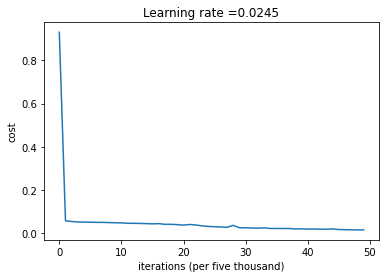

In [43]:
layers_dims = [9,18,16,1] 

best_params = parameter_regression_model(X_train, y_train, layers_dims, num_iterations = 250000, print_cost = True)

In [44]:
#print(best_params)

prediction: 1.939141 vs actual: 2.000000 

prediction: 1.059535 vs actual: 1.000000 

prediction: 2.245124 vs actual: 2.000000 

prediction: 3.246095 vs actual: 3.000000 

prediction: 1.006638 vs actual: 1.000000 

prediction: 1.006638 vs actual: 1.000000 

prediction: 0.941636 vs actual: 1.000000 

prediction: 0.000000 vs actual: 0.000000 

prediction: 0.000000 vs actual: 0.000000 

prediction: 1.063750 vs actual: 1.000000 

prediction: 1.006638 vs actual: 1.000000 

prediction: 1.279194 vs actual: 1.000000 

prediction: 1.018224 vs actual: 1.000000 

prediction: 1.122957 vs actual: 1.000000 

prediction: 2.981942 vs actual: 3.000000 

prediction: 0.000000 vs actual: 0.000000 

prediction: 0.000000 vs actual: 0.000000 

prediction: 2.076626 vs actual: 2.000000 

prediction: 1.000739 vs actual: 1.000000 

prediction: 1.910885 vs actual: 2.000000 

prediction: 1.006975 vs actual: 1.000000 

prediction: 0.000000 vs actual: 0.000000 

prediction: 0.960870 vs actual: 1.000000 

prediction:

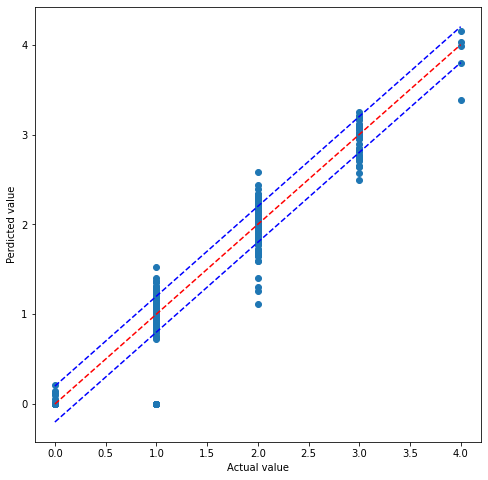

In [45]:
prediction_train = predict(X_train, y_train, best_params)

prediction: 1.470567 vs actual: 3.000000 

prediction: 2.223154 vs actual: 2.000000 

prediction: 0.000000 vs actual: 0.000000 

prediction: 1.461615 vs actual: 1.000000 

prediction: 0.998181 vs actual: 1.000000 

prediction: 1.006638 vs actual: 1.000000 

prediction: 0.000000 vs actual: 0.000000 

prediction: 0.000000 vs actual: 0.000000 

prediction: 0.979975 vs actual: 1.000000 

prediction: 0.000000 vs actual: 1.000000 

prediction: 2.746898 vs actual: 3.000000 

prediction: 0.769163 vs actual: 1.000000 

prediction: 2.764256 vs actual: 3.000000 

prediction: 1.266506 vs actual: 1.000000 

prediction: 2.010435 vs actual: 2.000000 

prediction: 0.000000 vs actual: 0.000000 

prediction: 2.936719 vs actual: 1.000000 

prediction: 1.004986 vs actual: 1.000000 

prediction: 1.006638 vs actual: 1.000000 

prediction: 1.013133 vs actual: 1.000000 

prediction: 1.140140 vs actual: 2.000000 

prediction: 1.757153 vs actual: 1.000000 

prediction: 0.000000 vs actual: 0.000000 

prediction:

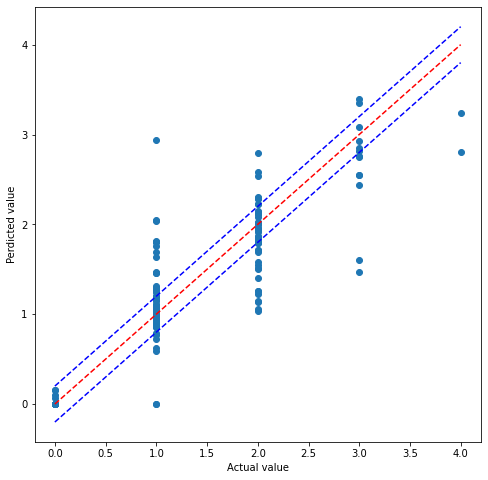

In [46]:
prediction_test = predict(X_test, y_test, best_params)

In [ ]:
#Current accuracy values suggest underfitting as both training and testing accuracy are low